# S5
This is a iPython Notebook document, associated to the S5 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

# Signal C1

PDI of x1 = 1.79150742463


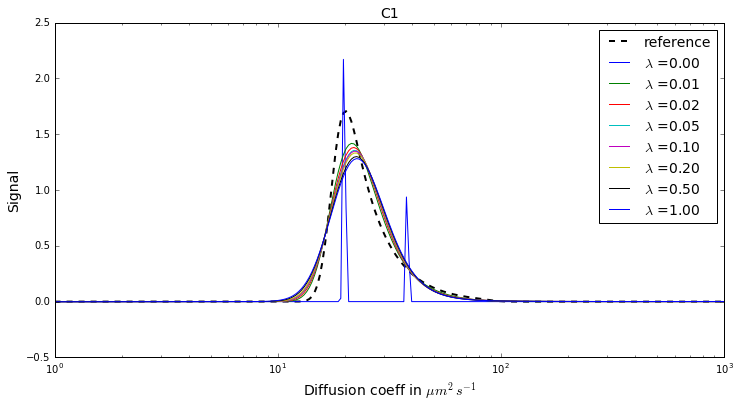

,$\lambda$,Quality reconstruction in $dB$ of Xu1,PDI of Xu1
0,0.00,-9.872662,1.501097
1,0.01,15.216955,1.686290
2,0.02,13.760859,1.760136
3,0.05,12.926708,2.202324
4,0.10,12.716871,4.090994
5,0.20,12.375972,8.417145
6,0.50,11.657711,16.198632
7,1.00,11.211401,19.076808


In [3]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import Code.scene as scene 
import Code.PALMA as PALMA
import pandas as pd
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D = 16
noise = 0.001 #noise = 0.1%
##############################
#Algorithm parameter
##############################
nbiter = 200000
prec = 1E-14
full_output = False
##############################
# Measurement of signal C1 
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, M)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#Xu1
x1 = scene.scene_Xu(N, Dmin, Dmax, width=4)
x1 = x1.reshape((N,1))
z1 = np.dot(K,x1) 
sigma1 = noise*z1[0]
y1 = z1 + sigma1*np.random.randn(M,1)
eta1 = 1.01*np.sqrt(M)*sigma1
##############################
#PDI coefficient of signal C1
##############################
pdi_1 = scene.PDI(x1, N, Dmin , Dmax)
print 'PDI of x1 =', pdi_1
##############################
#Signal reconstruction
##############################
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
Qlt_1 = []
PDI_1 = []
plt.figure(figsize=(12,6))
coeff = 8
plt.semilogx(Lap_axis, x1, 'k--', linewidth = 2,  label = "reference")
for lamda in LamdaList:
    #Reconstruction of the signal C1
    x1_n, criters = PALMA.PPXAplus(K, Binv, y1, eta1, nbiter, lamda, prec, full_output)
    #Plot of recovered signal C1
    plt.semilogx(Lap_axis,x1_n/coeff, linewidth = 1,  label = r"$\lambda$ =%.2f" % lamda)
    plt.legend(loc=1, fontsize=14)
    plt.title("C1", fontsize=14)
    plt.ylabel("Signal", size=14)
    plt.xlabel("Diffusion coeff in $\mu m^2 \, s^{-1}$", size=14)
    plt.ylim(ymin=-0.5, ymax=2.5)
    error1 =  np.linalg.norm(x1_n-x1,2) / np.linalg.norm(x1)   
    quality1 = -20*np.log10(error1) 
    Qlt_1.append(quality1)
    #PDI coeff
    pdi1 = scene.PDI(x1_n, N, Dmin, Dmax)
    PDI_1.append(pdi1)
    coeff = 1
#plt.savefig('SC.eps', format='eps', dpi=1000)
plt.show()
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$ of Xu1"] = list(Qlt_1)
tab["PDI of Xu1"]= list(PDI_1)
tab